# Лабораторна робота 1

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

l = """8 4 4  7  5 5  5 3 10  2  3 6 7 6 10
       6 7 7  6 10 7  6 8 10  7  7 9 1 3  4
       7 4 4  5  4 9  6 5  9  5  6 5 6 4  7
       2 5 7  6  7 3  8 8  7  4  7 5 7 6  6
       5 6 6  6 12 5 11 8  1 10 10 9 1 4  5 
       6 8 4 10 8 
    """
a = [int(s) for s in l.split()]
an = np.array(a)
an

array([ 8,  4,  4,  7,  5,  5,  5,  3, 10,  2,  3,  6,  7,  6, 10,  6,  7,
        7,  6, 10,  7,  6,  8, 10,  7,  7,  9,  1,  3,  4,  7,  4,  4,  5,
        4,  9,  6,  5,  9,  5,  6,  5,  6,  4,  7,  2,  5,  7,  6,  7,  3,
        8,  8,  7,  4,  7,  5,  7,  6,  6,  5,  6,  6,  6, 12,  5, 11,  8,
        1, 10, 10,  9,  1,  4,  5,  6,  8,  4, 10,  8])

Сумма генеральної сукупності

In [2]:
an.sum()

492

In [3]:
sum(a)

492

1) Запишемо варіаційний ряд

абсолютні частоти

In [4]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[3, 2, 4, 10, 12, 15, 14, 7, 4, 7, 1, 1]


In [5]:
hist, bin_edges = np.histogram(an)
print(np.unique(an))
print(hist)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 5  4 10 12 15 14  7  4  7  2]


In [6]:
ls = []
print(list(set(an)))
for j in list(set(an)):
    ls.append(np.count_nonzero(an == j))
print(ls)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[3, 2, 4, 10, 12, 15, 14, 7, 4, 7, 1, 1]


In [7]:
from itertools import groupby
freq = {key:len(list(group)) for key, group in groupby(np.sort(an))}
print(freq)
print(list(freq.keys()))
print(list(freq.values()))

{1: 3, 2: 2, 3: 4, 4: 10, 5: 12, 6: 15, 7: 14, 8: 7, 9: 4, 10: 7, 11: 1, 12: 1}
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[3, 2, 4, 10, 12, 15, 14, 7, 4, 7, 1, 1]


2) Обчислимо моду

In [8]:
from statistics import mode
mode(an)

6

In [9]:
repeticiones = 0
for i in a:
    apariciones = a.count(i)
    if apariciones > repeticiones:
        repeticiones = apariciones

modas = []
for i in a:
    apariciones = a.count(i)
    if apariciones == repeticiones and i not in modas:
        modas.append(i)

print(modas)

[6]


In [10]:
counts = np.bincount(an)
print(np.argmax(counts))

6


Медіана

In [11]:
from statistics import median
print(np.median(an))
print(median(an))

6.0
6.0


Варіаційний ряд відносних частот

In [12]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[3, 2, 4, 10, 12, 15, 14, 7, 4, 7, 1, 1]
[0.037, 0.025, 0.05, 0.125, 0.15, 0.188, 0.175, 0.087, 0.05, 0.087, 0.013, 0.013]


In [13]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(i / len(a))
print(np.array(l_rel))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[3, 2, 4, 10, 12, 15, 14, 7, 4, 7, 1, 1]
[ 0.0375  0.025   0.05    0.125   0.15    0.1875  0.175   0.0875  0.05
  0.0875  0.0125  0.0125]


Гістограма та полігон абсолютних частот

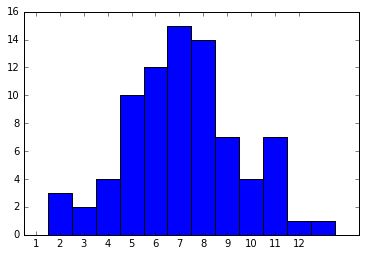

In [14]:
import matplotlib.pyplot as plt
width = 1
plt.bar(list(counter), l_values, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

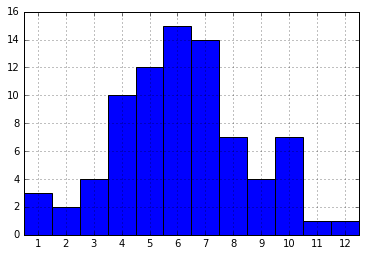

In [15]:
from collections import Counter
labels, values = zip(*Counter(a).items())
indexes = np.arange(len(labels))
width = 1
plt.grid(True)
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

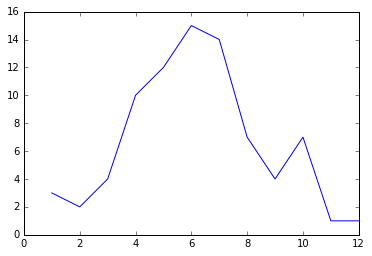

In [16]:
plt.plot(list(counter.keys()), values)
plt.show()

In [17]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
iplot([{"x": list(counter), "y": l_values}])

Гістограма та полігон відносних частот

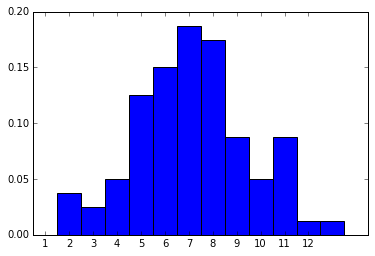

In [18]:
plt.bar(list(counter), l_rel, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

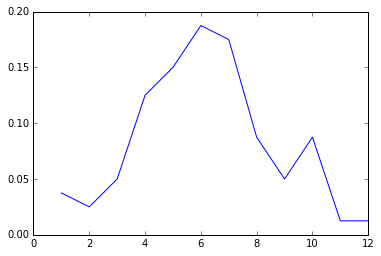

In [19]:
plt.plot(list(counter.keys()), l_rel)
plt.show()

In [20]:
init_notebook_mode(connected=True)
iplot([{"x": list(counter.keys()), "y": l_rel}])

4.1) Вибіркове середнє є незміщеною оцінкою генерального середнього і обчислюються за формулою.
Sample mean and covariance

In [21]:
from statistics import mean
print(mean(a))
print(np.mean(an))

6.15
6.15


4.2) Знайдемо незміщену оцінку генеральної дисперсії та середнього квадратичного відхилення:

sample variance

In [22]:
from statistics import variance
print(variance((a)))
print(np.cov(an))

5.622784810126582
5.622784810126583


Знайдемо середнє відхилення.


mean absolute deviation MAD

In [23]:
n = float(len(an))
mean = sum(an) / n
diff = [abs(x - mean) for x in an]
sum(diff) / n

1.8475000000000006

sqrt(Db)

In [24]:
from statistics import pvariance
from math import sqrt
print(sqrt(pvariance((a))))
print(sqrt(np.var(an)))

2.3563743335896357
2.3563743335896357


Знайдемо коефіцієнт варіації V 

Statistical dispersion

In [25]:
print((sqrt(np.var(an)) / np.mean(an)) )

0.383150298145


Накопичені частоти сортовані

In [26]:
ls = []
print(l_rel)
for i in range(len(l_rel)):
    ls.append(sum(l_rel[i:len(l_rel)]))
ls.reverse()

[0.0375, 0.025, 0.05, 0.125, 0.15, 0.1875, 0.175, 0.0875, 0.05, 0.0875, 0.0125, 0.0125]


Накопичені частоти

In [27]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.038,  0.062,  0.112,  0.238,  0.387,  0.575,  0.75 ,  0.838,
        0.888,  0.975,  0.988,  1.   ])

Складемо другу статистичну таблицю

In [28]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': list(counter.values()),
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,3,0,0.038,0.038
1,2,1,0.025,0.062
2,4,2,0.050,0.112
3,10,3,0.125,0.238
4,12,4,0.150,0.387
5,15,5,0.188,0.575
6,14,6,0.175,0.750
7,7,7,0.088,0.838
8,4,8,0.050,0.888
9,7,9,0.088,0.975
